# Numerisk løsning av Lorenz system 
 Lorenz system er et system av differensialigninger først studert av Edward Lorenz. Ligningene har opprinelse fra meterologi og er kaotiske av natur. Kaotisk betyr at systemet er sensistivt til initial betingelser og løsningen av ligningen avhenger sterk på konstanter. For å løse ligningene implementerte jeg diverse numeriske metoder for å løse system av differnsial ligninger som euler, heun og Runge Kutta 4. Der etter tok jeg 4 forskjellige initalbetingelser, løste Lorenz systemt og plottet løsningene. Resultatene var pene og visste en tydelig struktur i kaoset.


## Definisjon av problemet 

$x,y,z$ er alle en gang kontinuerlig deriverbare funksjoner og $\sigma, \rho, \beta \in \mathbb{R}$ konstanter
$$
\begin{align}
\frac{dx}{dt} = & \sigma (y - x) \\
\frac{dy}{dt} =  & x (\rho - z) - y \\
\frac{dz}{dt} = & x y - \beta z 
\end{align}
$$

Bruker $\rho = 30, \sigma = 11, \beta = 8/3$ da dette gir interessante løsninger.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
def euler(x0, f, T, n):
    t = np.linspace(0,T, n)
    h = T/n
    x = np.zeros((len(x0), n))
    x[:,0] = x0
    for i in range(0,n-1):
        k1 = f(t[i], x[:,i])
        x[:,i+1] = x[:,i] + h*k1
    return x,t

def heun(x0, f, T, n):
    t = np.linspace(0,T, n)
    h = T/n
    x = np.zeros((len(x0), n))
    x[:,0] = x0
    for i in range(0,n-1):
        k1 = f(t[i], x[:,i])
        k2 = f(t[i+1], x[:,i] + h* k1)
        x[:,i+1] = x[:,i] + h/2*(k1+k2)
    return x,t

def RK4(x0, f, T, n):
    t = np.linspace(0,T, n)
    h = T/n
    x = np.zeros((len(x0), n))
    x[:,0] = x0
    for i in range(0,n-1):
        k1 = f(t[i], x[:,i])
        k2 = f(t[i] + h/2, x[:,i] + h/2*k1)
        k3 = f(t[i] + h/2, x[:,i] + h/2*k2)
        k4 = f(t[i+1], x[:,i] + h*k3)
        x[:,i+1] = x[:,i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return x,t

def derivative(x,t):
    dx = np.zeros_like(x)
    for i in range(len(x)-1):
        dx = (x[:,i+1] - x[:,i])/(t[i+1] - t[i])
    return dx
    x[:,0] = x0
    for i in range(0,n-1):
        k1 = f(t[i], x[:,i])
        x[:,i+1] = x[:,i] + h*k1
    return x,t

def heun(x0, f, T, n):
    t = np.linspace(0,T, n)
    h = T/n
    x = np.zeros((len(x0), n))
    x[:,0] = x0
    for i in range(0,n-1):
        k1 = f(t[i], x[:,i])
        k2 = f(t[i+1], x[:,i] + h* k1)
        x[:,i+1] = x[:,i] + h/2*(k1+k2)
    return x,t

def RK4(x0, f, T, n):
    t = np.linspace(0,T, n)
    h = T/n
    x = np.zeros((len(x0), n))
    x[:,0] = x0
    for i in range(0,n-1):
        k1 = f(t[i], x[:,i])
        k2 = f(t[i] + h/2, x[:,i] + h/2*k1)
        k3 = f(t[i] + h/2, x[:,i] + h/2*k2)
        k4 = f(t[i+1], x[:,i] + h*k3)
        x[:,i+1] = x[:,i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return x,t


In [4]:
def f(t, x, rho = 30, sigma = 11 , beta = 8/3):
    return np.array([sigma*(x[1] - x[0]), x[0]*(rho - x[2]) - x[1], x[0]*x[1] - beta*x[2]])

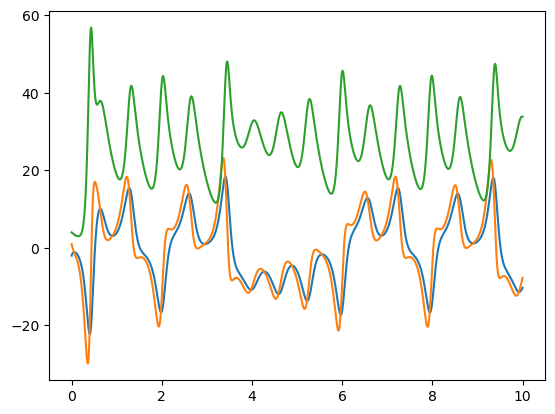

In [5]:
x0 = [-2,1,4]
x,t = euler(x0, f, 10, 1000)
plt.plot(t,x[0])
plt.plot(t,x[1])
plt.plot(t,x[2])

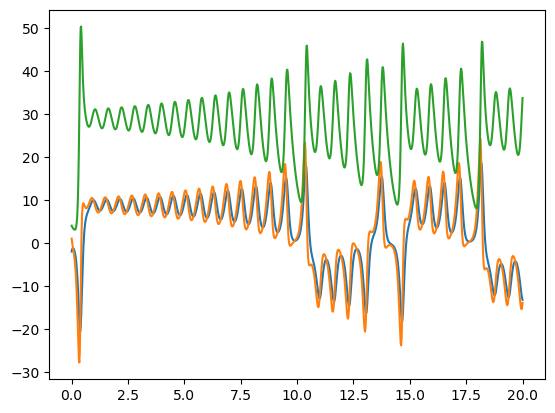

In [38]:
x0 = [-2,1,4]
x,t = heun(x0, f, 20, 1000)
plt.plot(t,x[0])
plt.plot(t,x[1])
plt.plot(t,x[2])

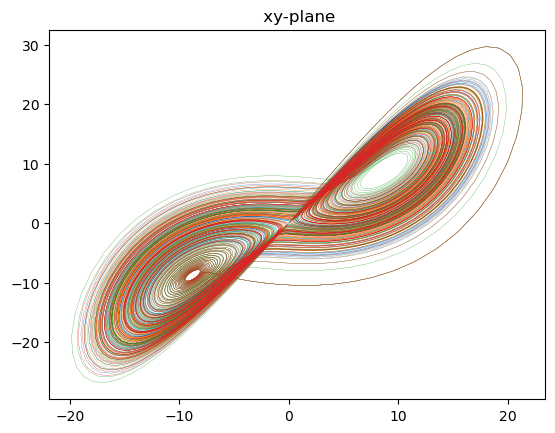

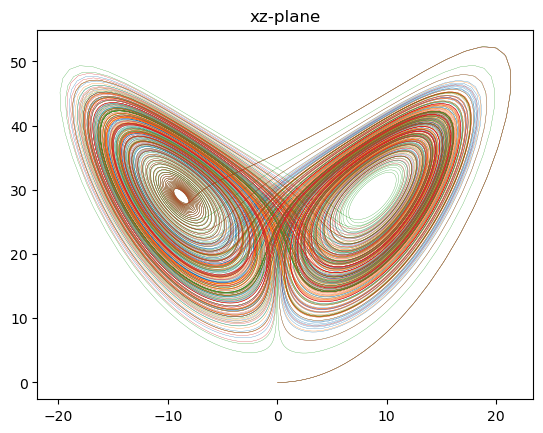

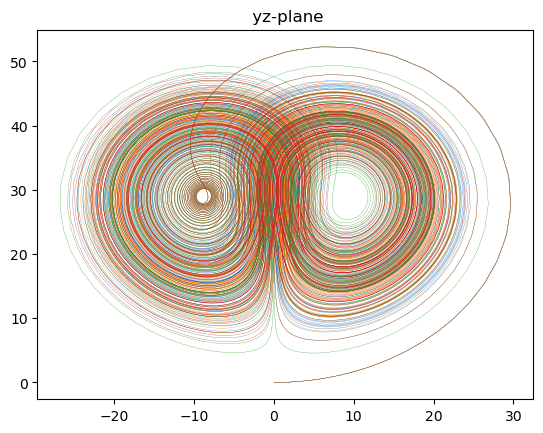

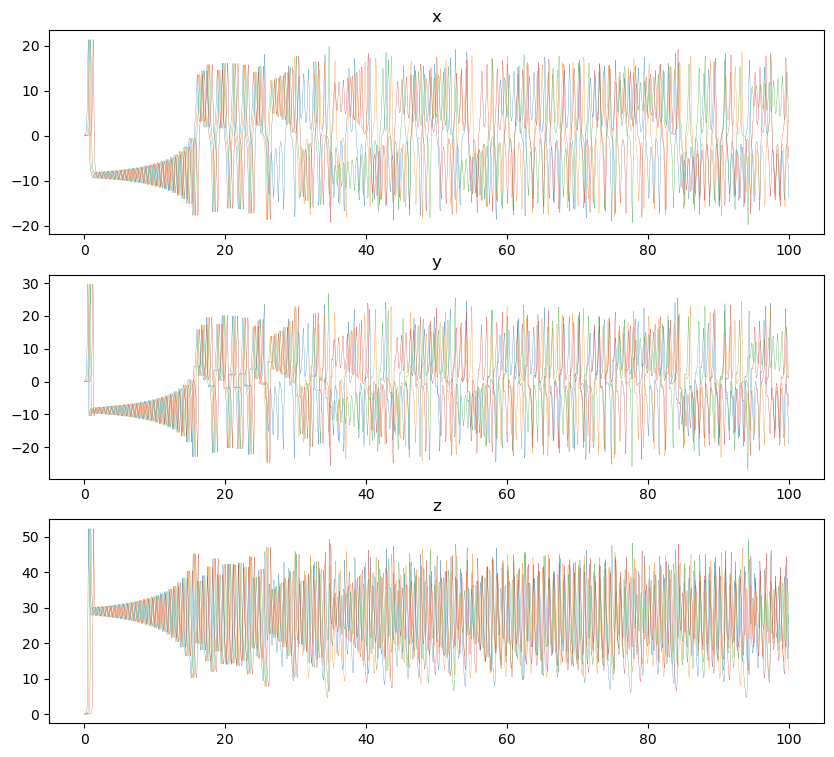

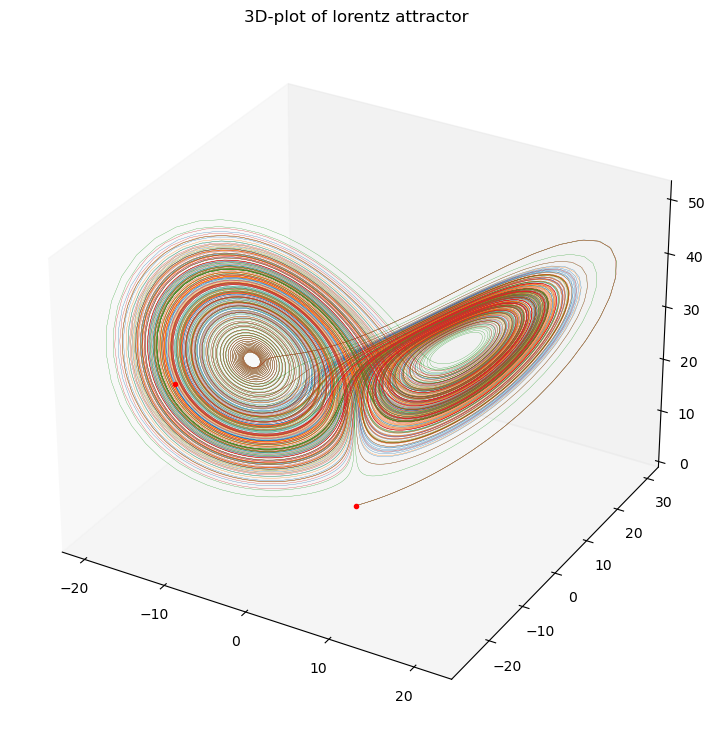

In [57]:
T = 100
x1,t = RK4([0.1,0,0], f, T, 10000)
x2,t = RK4([0.01,0,0], f, T, 10000)
x3,t = RK4([0.001,0,0], f, T, 10000)
x4,t = RK4([0.00001,0,0], f, T, 10000)

plt.rcParams['lines.linewidth'] = 0.2
plt.figure()
plt.title(f' xy-plane')
plt.plot(x1[0],x1[1])
plt.plot(x2[0],x2[1])
plt.plot(x3[0],x3[1])
plt.plot(x4[0],x4[1])


plt.figure()
plt.title(f'xz-plane')
plt.plot(x1[0],x1[2])
plt.plot(x2[0],x2[2])
plt.plot(x3[0],x3[2])
plt.plot(x4[0],x4[2])


plt.figure()
plt.title(f' yz-plane')
plt.plot(x1[1],x1[2])
plt.plot(x2[1],x2[2])
plt.plot(x3[1],x3[2])
plt.plot(x4[1],x4[2])


fig,axs = plt.subplots(3,1, figsize = (10,9))
axs[0].plot(t,x1[0])
axs[0].plot(t,x2[0])
axs[0].plot(t,x3[0])
axs[0].plot(t,x4[0])
axs[0].set_title(f'x')
axs[1].plot(t,x1[1])
axs[1].plot(t,x2[1])
axs[1].plot(t,x3[1])
axs[1].plot(t,x4[1])
axs[1].set_title(f'y')
axs[2].plot(t,x1[2])
axs[2].plot(t,x2[2])
axs[2].plot(t,x3[2])
axs[2].plot(t,x4[2])
axs[2].set_title(f'z')

fig = plt.figure(figsize= (16,9))
ax = plt.axes(projection = '3d')
ax.set_title(f'3D-plot of lorentz attractor')
ax.plot(x1[0],x1[1],x1[2])
ax.plot(x2[0],x2[1],x2[2])
ax.plot(x3[0],x3[1],x3[2])
ax.plot(x4[0],x4[1],x4[2])
ax.plot(x1[0,0], x1[1,0], x1[2,0], '.r')
ax.plot(x1[0,-1], x1[1,-1], x1[2,-1], '.r')
ax.grid(False)

Det første man merker med plottene er at de er veldig vakre! Synes jeg hvertfall. Noe annet som er interssant er at alle banene ser ut til å være unike, men de følger en slags overordnet struktur eller form. Noe som hadde vært interessant hadde vært å se på fourier transformasjonen av hver av ligningene da vi ser at plottene av $x,y,z$ mot tiden har harmoniske tendenser.

Videre så jeg på et annet system:

$$
\begin{align}
\frac{dx}{dt} = & -y - z b \\
\frac{dy}{dt} = & x + a y \\
\frac{dz}{dt} = & b + x z - c z \\
\end{align}
$$
Med $a = 0.55, b =2, c =4 $

In [61]:
def g(t, x, a = 0.55, b = 2 , c = 4):
    return np.array([-x[1] - x[2], x[0] + a*x[1], b + x[0]*x[2] - c*x[2]])

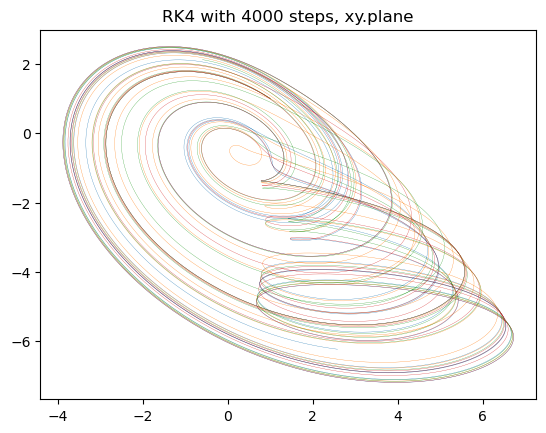

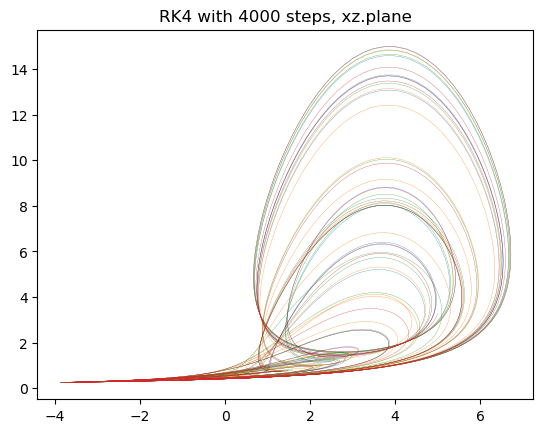

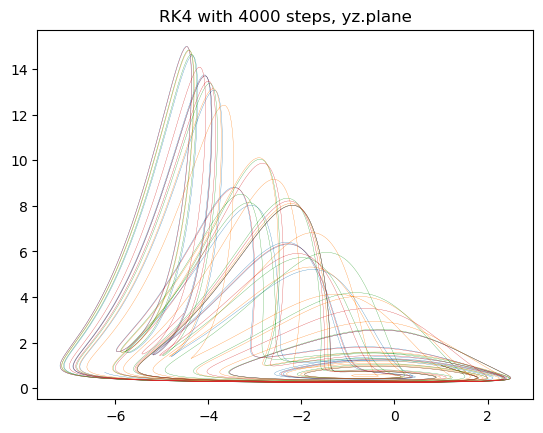

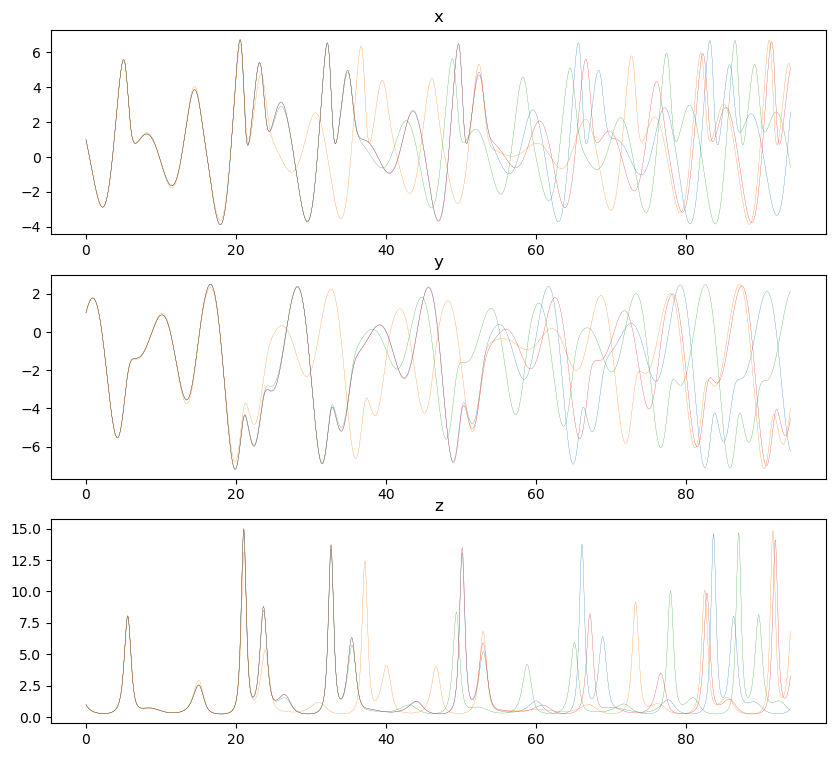

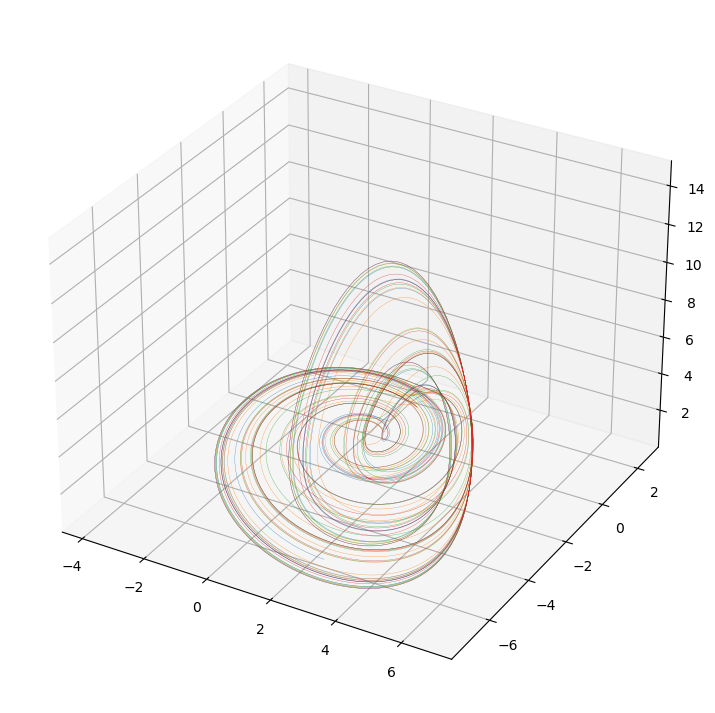

In [64]:
x1,t = RK4([1, 1,1], g, 94, 4000)
x2,t = RK4([1.01, 1,1], g, 94, 4000)
x3,t = RK4([1.001, 1,1], g, 94, 4000)
x4,t = RK4([1.0001, 1,1], g, 94, 4000)
plt.figure()
plt.title(f'RK4 with 4000 steps, xy.plane')
plt.plot(x1[0],x1[1])
plt.plot(x2[0],x2[1])
plt.plot(x3[0],x3[1])
plt.plot(x4[0],x4[1])

plt.figure()
plt.title(f'RK4 with 4000 steps, xz.plane')
plt.plot(x1[0],x1[2])
plt.plot(x2[0],x2[2])
plt.plot(x3[0],x3[2])
plt.plot(x4[0],x4[2])

plt.figure()
plt.title(f'RK4 with 4000 steps, yz.plane')
plt.plot(x1[1],x1[2])
plt.plot(x2[1],x2[2])
plt.plot(x3[1],x3[2])
plt.plot(x4[1],x4[2])

fig,axs = plt.subplots(3,1, figsize = (10,9))
axs[0].plot(t,x1[0])
axs[0].plot(t,x2[0])
axs[0].plot(t,x3[0])
axs[0].plot(t,x4[0])
axs[0].set_title(f'x')
axs[1].plot(t,x1[1])
axs[1].plot(t,x2[1])
axs[1].plot(t,x3[1])
axs[1].plot(t,x4[1])
axs[1].set_title(f'y')
axs[2].plot(t,x1[2])
axs[2].plot(t,x2[2])
axs[2].plot(t,x3[2])
axs[2].plot(t,x4[2])
axs[2].set_title(f'z')

fig = plt.figure(figsize= (16,9))
ax = plt.axes(projection = '3d')
ax.plot(x1[0],x1[1],x1[2])
ax.plot(x2[0],x2[1],x2[2])
ax.plot(x3[0],x3[1],x3[2])
ax.plot(x4[0],x4[1],x4[2])

Igjen ser vi at vi får unike løsninger, men med en overordnet struktur. Gøy å finne sånne mønster i matematikken:)